The Spark Foundation #GRIP AUG21

DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP

TASK 3: Exploratory Data Analysis-Retail

Name: UPASANA SARMA

##Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##Loading datasets

In [ ]:
superstore = pd.read_csv('SampleSuperstore.csv')
superstore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
superstore.shape

(9994, 13)

In [ ]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


##Dataset Summary

## Visualising correlation matrix

In [ ]:
corr_mat = superstore.corr()
corr_mat

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


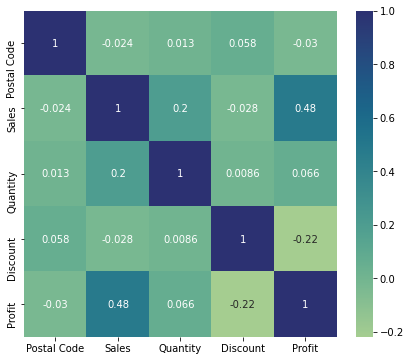

In [ ]:
plt.figure(figsize=(7,6))
sns.heatmap(corr_mat, cmap='crest', annot=True)

In [ ]:
superstore['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

## Superstore Category Visualisation

Text(0.5, 1.0, 'superstore categories')

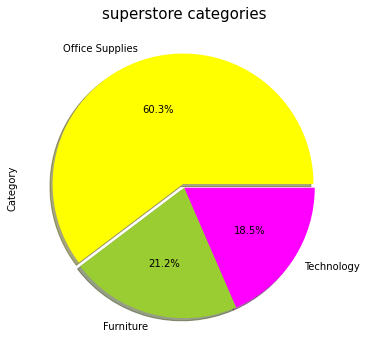

In [ ]:
plt.figure(figsize=(15,6))
cat = superstore['Category'].value_counts()
cmap = plt.get_cmap('Spectral')
colors = ['yellow', 'yellowgreen', 'magenta']
cat.plot.pie( autopct='%1.1f%%', shadow = True, colors = colors, explode = (0.03, 0, 0))
plt.title('superstore categories', fontsize = 15)

## Visualising subcategories

In [ ]:
superstore['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sub Category Counts')

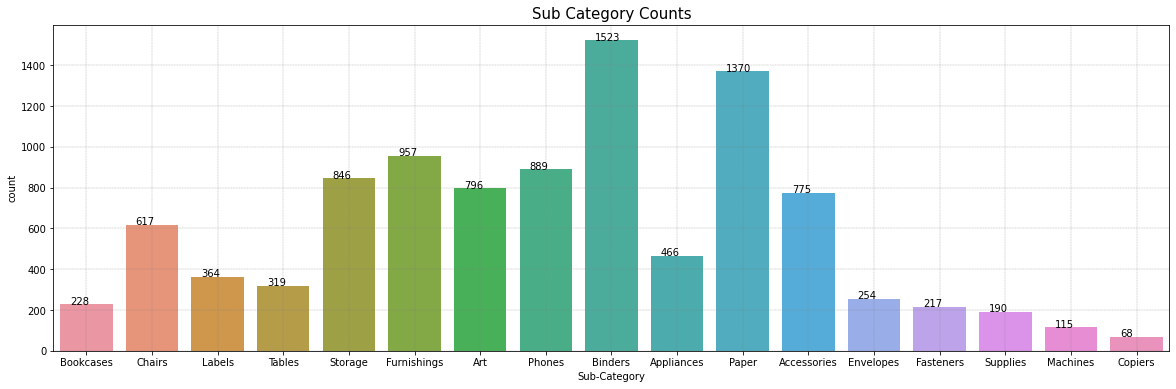

In [ ]:
fig = plt.figure(figsize = (20,6))
axes = fig.add_subplot(111)
s = sns.countplot('Sub-Category', data = superstore)
for s in axes.patches:
  axes.annotate('{:.0f}' .format(s.get_height()), (s.get_x()+0.15 , s.get_height()+1))
plt.grid(color = 'gray', ls = '--', lw = 0.3)
plt.title('Sub Category Counts', fontsize = 15)

Text(0.5, 1.0, 'Superstore Sub Category products')

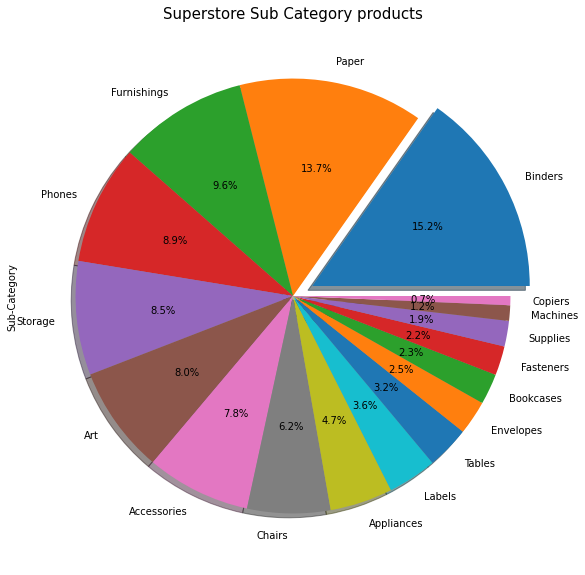

In [ ]:
plt.figure(figsize=(20,10))
sub_cat=superstore['Sub-Category'].value_counts()
theme=plt.get_cmap('hsv')
sub_cat.plot.pie(autopct='%1.1f%%', shadow=True, explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0))
plt.title('Superstore Sub Category products', fontsize=15)

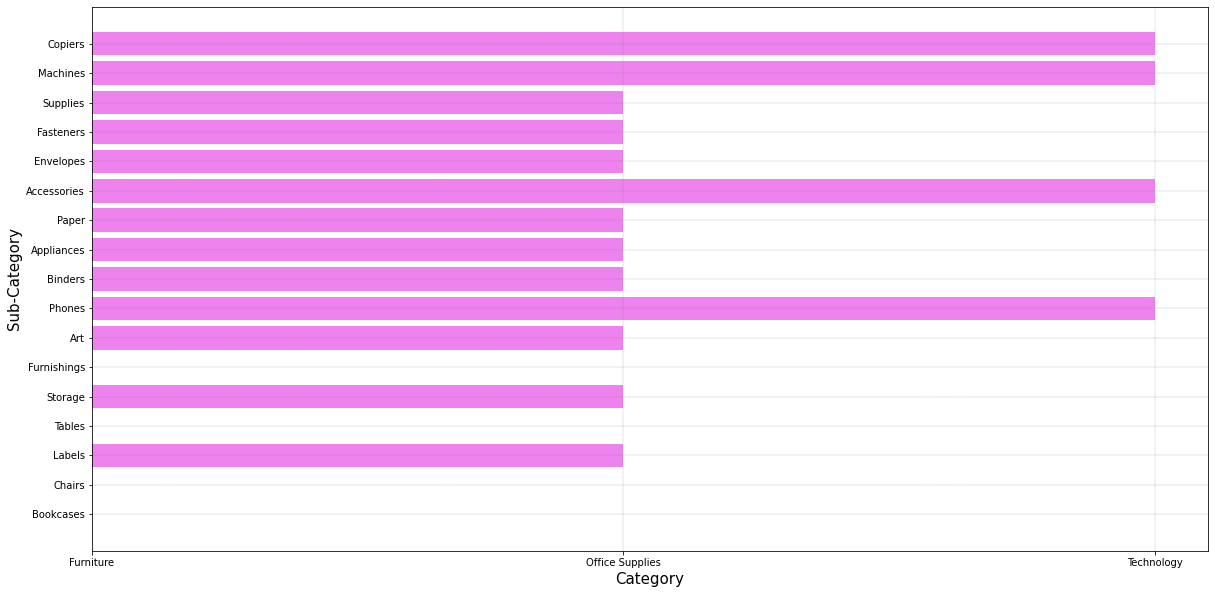

In [ ]:
plt.figure(figsize=(20,10))
plt.barh('Sub-Category', 'Category', data=superstore, color='violet')
plt.xlabel('Category',fontsize = 15)
plt.ylabel('Sub-Category',fontsize = 15)
plt.grid(color='gray', ls='--', lw= 0.3)

## Visual the total sales and profit by subcategories

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


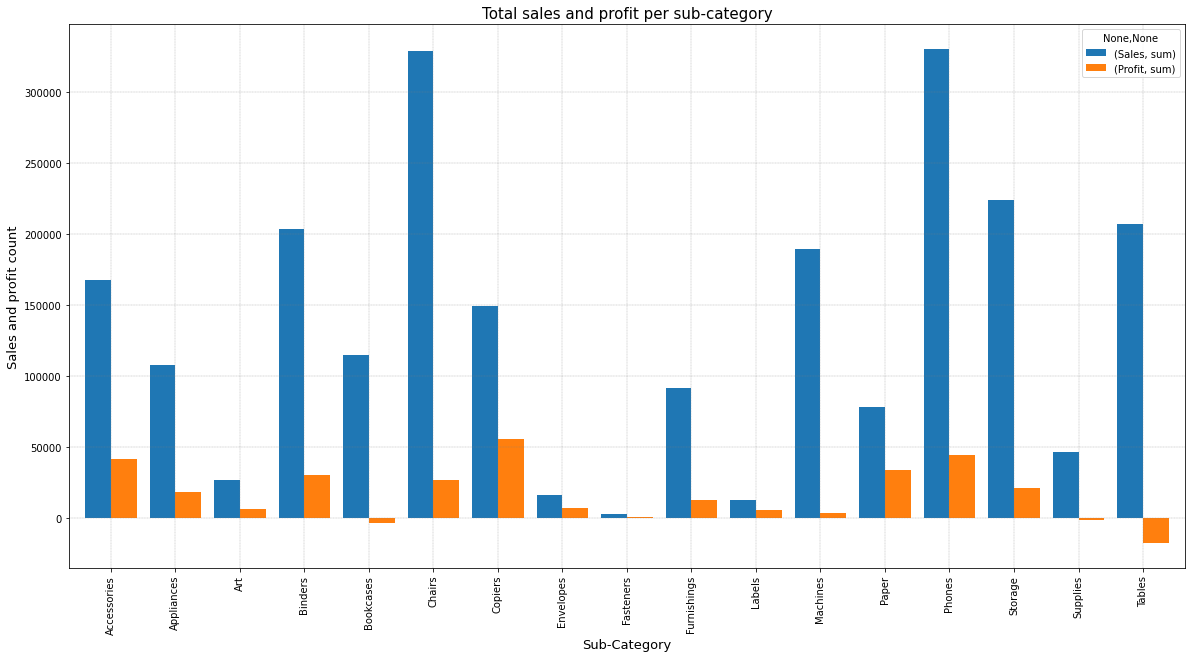

In [ ]:
sales_profit_sum = superstore.groupby('Sub-Category')['Sales','Profit'].agg(['sum'])
sales_profit_sum.plot.bar(width=0.8, figsize=(20,10))
plt.title('Total sales and profit per sub-category', fontsize=15)
plt.xlabel('Sub-Category', fontsize=13)
plt.ylabel('Sales and profit count', fontsize=13)
plt.grid(color='gray', ls='--', lw=0.3)

## visualising how much product is distributed regionwise

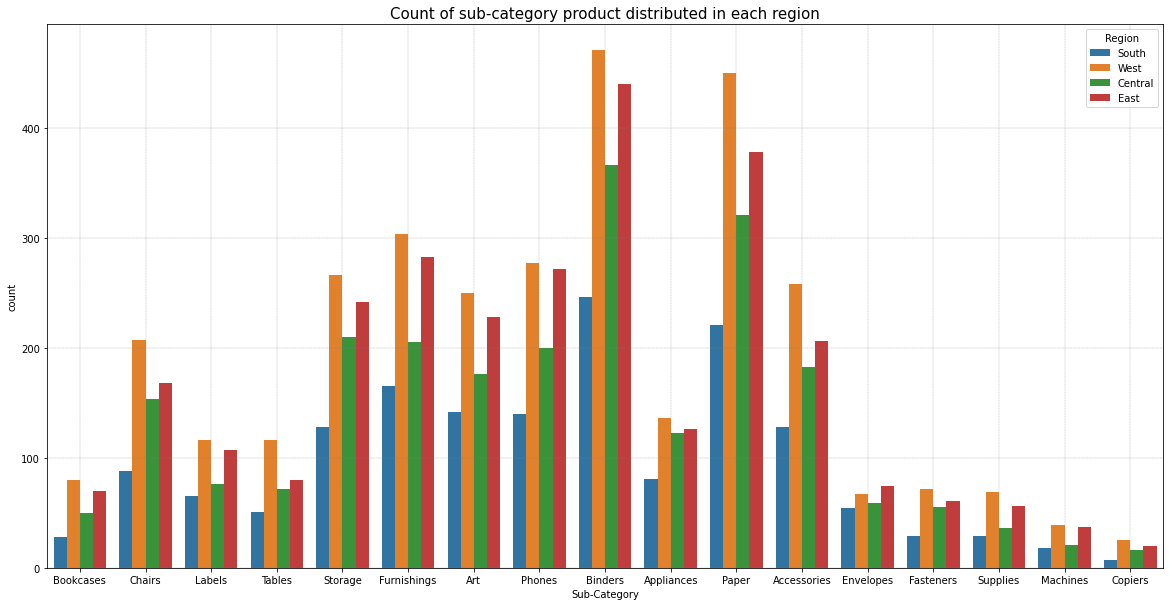

In [ ]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data=superstore, x='Sub-Category', hue='Region')
plt.title('Count of sub-category product distributed in each region', fontsize=15)
plt.grid(color='gray', ls='--', lw=0.3)

## Finding the cost

In [ ]:
# adding new column cost in the existing data
superstore['Cost'] = superstore['Sales']-superstore['Profit']
superstore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.7486
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,19.8516


## cost visualisation

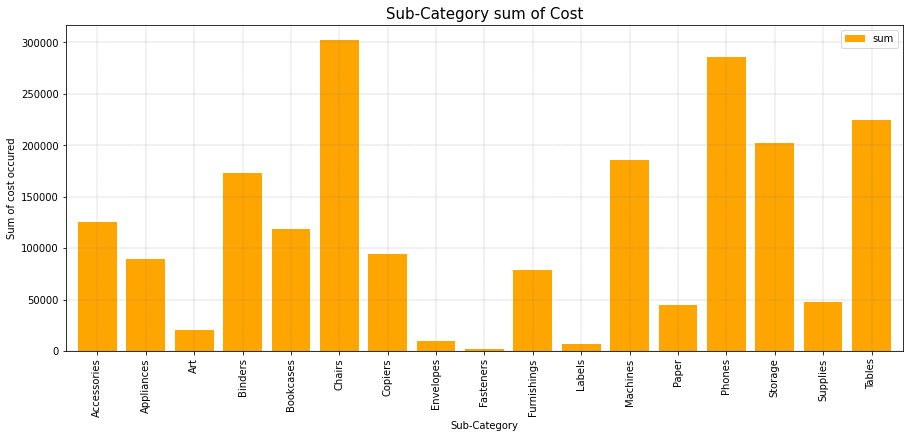

In [ ]:
Cost_occured = superstore.groupby('Sub-Category')['Cost'].agg(['sum'])
Cost_occured.plot.bar(width=0.8, figsize=(15,6), color='orange')
plt.title('Sub-Category sum of Cost', fontsize = 15 )
plt.ylabel('Sum of cost occured')
plt.grid( color='gray', ls='--', lw = 0.3)

## visualisation of total sale by sub-category

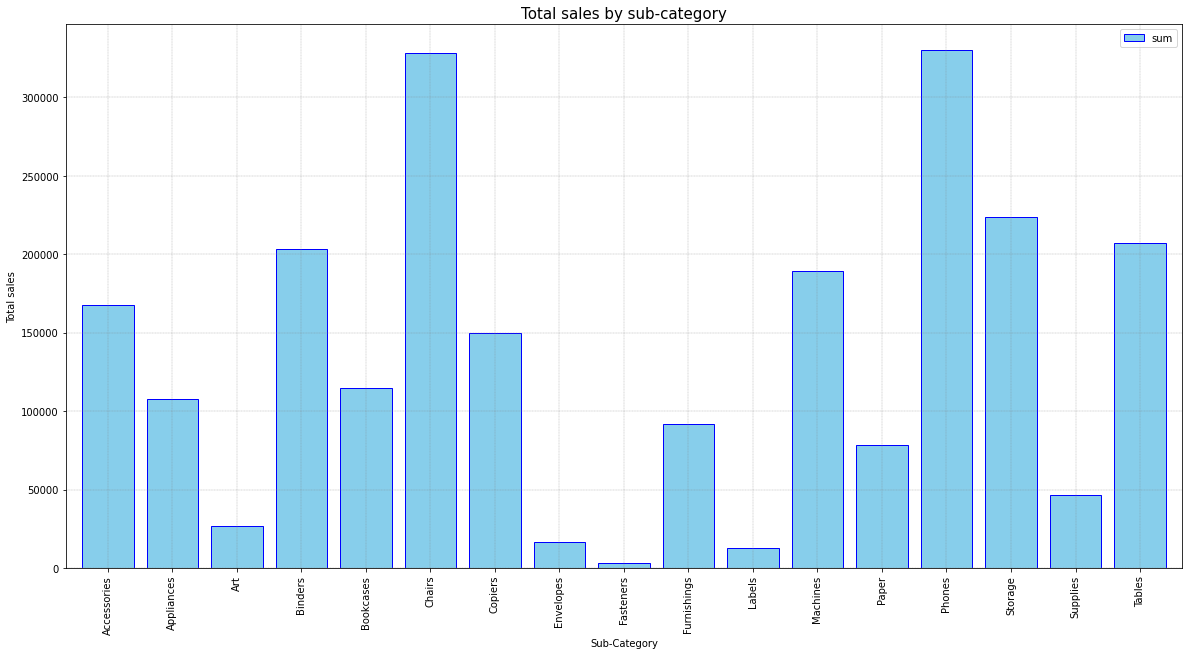

In [ ]:
sub_cat_sales = superstore.groupby('Sub-Category')['Sales'].agg(['sum'])
sub_cat_sales.plot.bar(width=0.8, color='skyblue', edgecolor='blue')
plt.title('Total sales by sub-category', fontsize=15)
plt.ylabel('Total sales')
plt.grid(color='gray', ls='--', lw= 0.3)

## Finding profit percentage

In [ ]:
superstore['profit %'] = (superstore['Profit']/superstore['Cost'])*100
# Profit percentage of first 5 product names
superstore.iloc[:5,[8,14]]

,Sub-Category,profit %
0,Bookcases,19.047619
1,Chairs,42.857143
2,Labels,88.679245
3,Tables,-28.571429
4,Storage,12.676056


## Identifying which sub-category makes most profit

In [ ]:
# Products with high profit percentage
superstore.sort_values(['profit %', 'Sub-Category'], ascending = False).groupby('profit %').head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,profit %
1696,Second Class,Home Office,United States,Bayonne,New Jersey,7002,East,Technology,Phones,104.980,2,0.0,52.4900,52.4900,100.000000
2592,Second Class,Corporate,United States,Summerville,South Carolina,29483,South,Technology,Phones,79.100,2,0.0,39.5500,39.5500,100.000000
6338,Standard Class,Corporate,United States,New York City,New York,10035,East,Technology,Phones,87.800,4,0.0,43.9000,43.9000,100.000000
246,Second Class,Home Office,United States,Lakeville,Minnesota,55044,Central,Office Supplies,Paper,47.880,6,0.0,23.9400,23.9400,100.000000
381,First Class,Corporate,United States,San Francisco,California,94109,West,Office Supplies,Paper,50.960,7,0.0,25.4800,25.4800,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,Standard Class,Corporate,United States,Austin,Texas,78745,Central,Office Supplies,Appliances,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,Standard Class,Corporate,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,92.2050,-73.333333
9164,Standard Class,Consumer,United States,Chicago,Illinois,60610,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,536.7300,-73.333333
261,Standard Class,Corporate,United States,Pasadena,Texas,77506,Central,Office Supplies,Appliances,1.624,2,0.8,-4.4660,6.0900,-73.333333


## Count segmentation

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


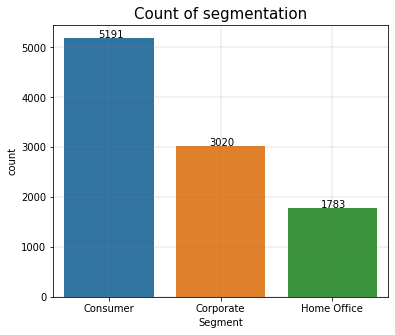

In [ ]:
fig = plt.figure(figsize=(6,5))
axes = fig.add_subplot(111)
s = sns.countplot('Segment', data = superstore)
for s in axes.patches:
  axes.annotate('{:.0f}' .format(s.get_height()), (s.get_x()+0.3, s.get_height()+1))
plt.title('Count of segmentation', fontsize=15)
plt.grid(color='grey', ls='--', lw= 0.3)

## Calculating the profit gain in each sub-categories by segmentwise

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


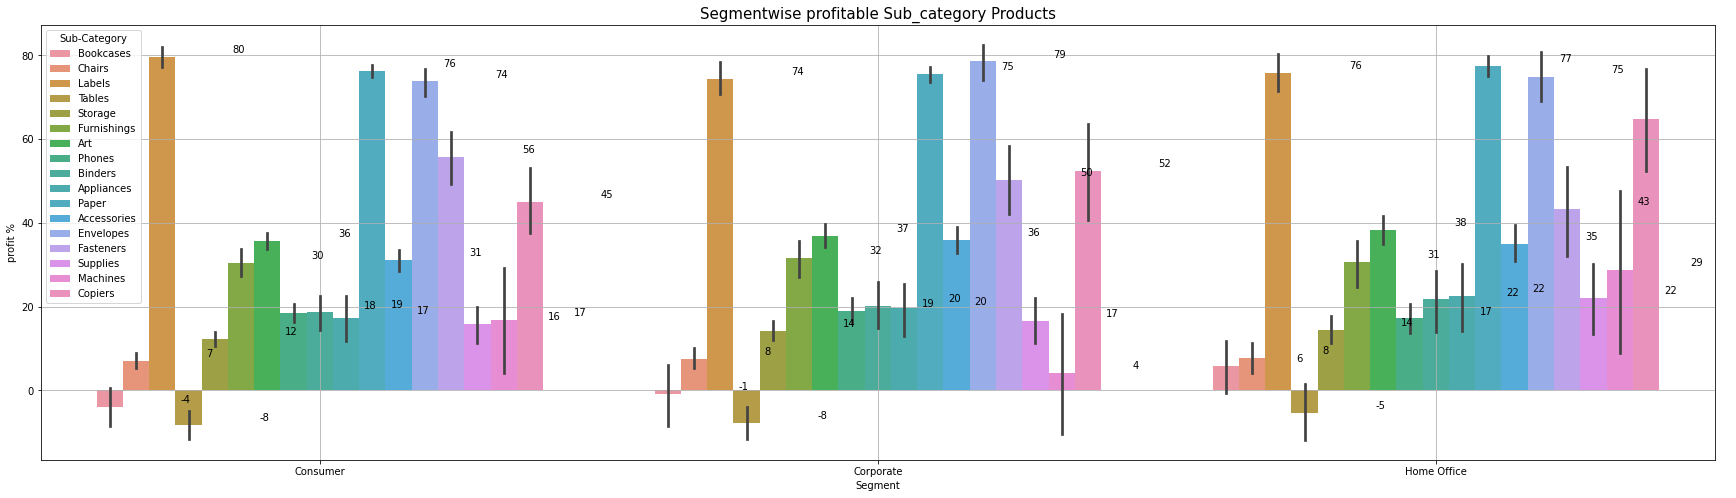

In [ ]:
fig = plt.figure(figsize=(30,8))
axes = fig.add_subplot(111)
s = sns.barplot('Segment','profit %', hue = 'Sub-Category', data = superstore)
for s in axes.patches:
  axes.annotate('{:.0f}' .format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.title('Segmentwise profitable Sub_category Products', fontsize = 15)
plt.grid()